# Hands-on 3: Polynomial Regression: A Comprehensive Guide
**Alumno:** Montes Medina Carlos Alberto  
**Materia:** Inteligencia Artificial  
**Fecha:** (11/10/2025)
Introducción



*La regresión polinómica*

Es una extensión de la regresión lineal que permite ajustar relaciones no lineales entre variables. En lugar de usar una línea recta, usa una curva polinómica que puede adaptarse mejor a datos que no siguen una tendencia lineal. Su ecuación general es:

y = β₀ + β₁x + β₂x² + ... + βₙxⁿ + ε

Es útil cuando los datos tienen una forma curva y la regresión lineal simple no logra representar correctamente la relación entre las variables.

### Pasos para hacer una Regresion Polinomial en Python
- Importar las librerias necesarias para el analisis
- Cargar los DataSets
- Hacer una particion en los datos (una para el entrenamiento y otra para probarlo)
- Definir el grado y usar la particion de los datos para entrenar y probar el modelo
- Evaluar el modelo polinomial con los valores:
  - Error cuadratico medio
  - R cuadradada
- Finalmente hacer una graficación para mostrar los resultados

In [17]:
# =====================================================
# 1. Importar librerías necesarias
# Ayudan para calculos matematicos, gráficar datos, descargar datasets, entrenar modelo de regresion lineal y evaluar el desempeño del modelo con sklearn metrics
# =====================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing  # Para cargar el dataset de California Housing
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import PolynomialFeatures  # Para generar nuevas características polinómicas
from sklearn.linear_model import LinearRegression    # Para crear y entrenar el modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Para evaluar el desempeño del modelo


### Cargar el dataset de California Housing
* Nota: se usó el dataset de California y no de Boston porque al ejecutar el NoteBook saltaba un error sobre un problema etico en los valores de Boston

In [21]:


california = fetch_california_housing() # Caracteristicas de la casa y su precio
x = california.data
y = california.target
# Para simplificar, tomaremos solo una característica y = precio, x = MedInc (Ingreso mediano) para poder graficar fácilmente
x = x[:, [0]]  # MedInc (índice 0 en el dataset)

### Hacer la particion
* Se usa la funcion train_test_split()
  - Argumentos de la funcion explicados:
  - x: son las columnas del DataSet que describen las casas (MedInc, HouseAge, AveRoom, etc...) en este caso solo se toma el ingreso Promedio "MedInc"
  - y: es el precio medio de las casas siendo el objetivo al que se quiere llegar representado en cientos de miles de dólares, e.g. un valor de 2.5 representa 250,000 dólares
  - test_size: De los registros de "MedInc" se tomara un porcentaje para hacerlo en prueba, el resto se usara para aprendeizaje. E.g un valor de 0.2 significa que el 20% de la data se usara para prueba y el 80% para aprendizaje
  - random_state: es un número semilla que funciona como divisor y es muy común para ejercicos de Machine Learnging, aparte de ser un chiste que hace referencia al libro “Guía del Autoestopista Galáctico" donde el número 42 es la respuesta al sentido de la vida


In [6]:
# =====================================================
# 3. Dividir el dataset en entrenamiento y prueba
# =====================================================

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# 80% para entrenar, 20% para probar
# random_state=42 asegura reproducibilidad

las funciones fit_transform() y transform() son para ajustar dependiendo del grado de la ecuación todas las combinaciones de la variable independiente.

E.g. Si la data de x tuviera dos columnas (x_1, x_2)
---

#### Grado 2 (`degree = 2`)
Incluye:
- El término constante (1)
- Las variables originales (\(x_1, x_2\))
- Los términos al cuadrado (\(x_1^2, x_2^2\))
- Los términos cruzados (\(x_1x_2\))

\[
[1, \; x_1, \; x_2, \; x_1^2, \; x_1x_2, \; x_2^2]
\]

---

En este caso solo tiene una columna (la de MedInc) entonces las combinaciones polinomicas serian
[1, x_1, x_2] (sin combinaciones)


In [7]:
# =====================================================
# 4. Crear características polinómicas
# =====================================================

degree = 2  # El grado del polinomio puede cambiar dependiendo de lo que se necesite
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)  # Genera las características polinómicas para entrenamiento
X_test_poly = poly.transform(X_test)        # Genera las características polinómicas para prueba

### Entrenamineto

Para "entrenar" el modelo se resuelve un sistema matricial para calcular las betas

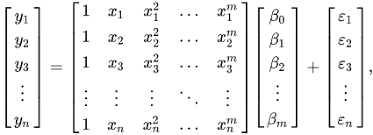

In [8]:
# =====================================================
# 5. Entrenar el modelo de regresión lineal sobre los datos polinómicos
# =====================================================

model = LinearRegression()  # Creamos el modelo
model.fit(X_train_poly, y_train)  # Entrenamos con los datos transformados

LinearRegression()

Si "y" es el valor real de los datos

"ŷ" es el valor predicho por el modelo y su formula tiene la siguiente forma:

ŷ = B_0 + B_1X_1 + B2_X2

In [9]:
# =====================================================
# 6. Hacer predicciones
# =====================================================

y_pred_train = model.predict(X_train_poly)  # Predicciones sobre los datos de entrenamiento
y_pred_test = model.predict(X_test_poly)    # Predicciones sobre los datos de prueba

### EValuar el modelo

Después de entrenar el modelo y obtener las predicciones (`y_pred_train` y `y_pred_test`),  
se usan métricas estadísticas para medir **qué tan bien el modelo predice los valores reales**.


El valor de MSE siginifica Error promedio en el entrenamiento

El valor de R² significa qué tanto explica el modelo los datos de entrenamiento

In [10]:
# =====================================================
# 7. Evaluar el modelo
# =====================================================

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Error cuadrático medio (MSE) entrenamiento: {mse_train:.4f}")
print(f"Error cuadrático medio (MSE) prueba: {mse_test:.4f}")
print(f"Coeficiente de determinación (R²) entrenamiento: {r2_train:.4f}")
print(f"Coeficiente de determinación (R²) prueba: {r2_test:.4f}")

Error cuadrático medio (MSE) entrenamiento: 0.6930
Error cuadrático medio (MSE) prueba: 0.7033
Coeficiente de determinación (R²) entrenamiento: 0.4816
Coeficiente de determinación (R²) prueba: 0.4633


**Visualización de los datos**
Ya solo queda hacer uso de las librerias que ofrece pyhton para hacer graficación `matplotlib` y mostrar los datos obtenidos

***Explicación de la gráfica***

Los puntos azules son los valores con los que se entreno el modelo

Los puntos verdes son los valores de prueba

La linea roja es la curva resultante de la regresion polinomial


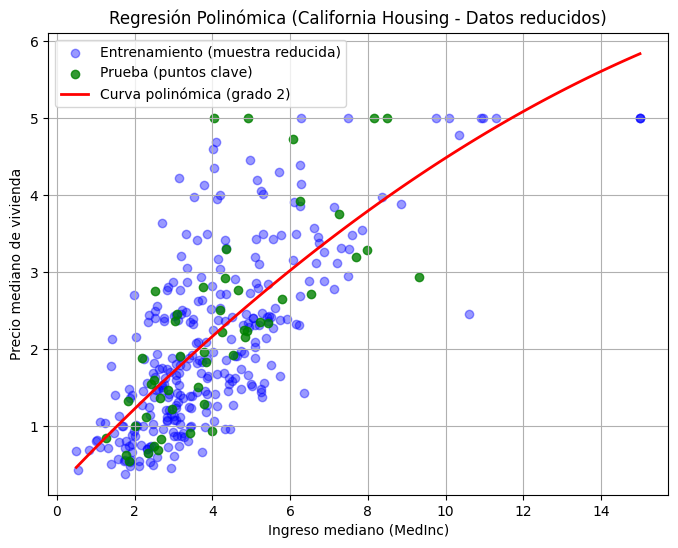

In [11]:
# ===========================================
# VISUALIZACIÓN LIMPIA Y ORDENADA
# ===========================================

# Reducimos la cantidad de datos para graficar
train_sample_size = 300   # menos puntos de entrenamiento
test_sample_size = 50     # muy pocos puntos de prueba (los más representativos)

# Tomamos muestras aleatorias sin reemplazo
train_indices = np.random.choice(len(X_train), train_sample_size, replace=False)
test_indices = np.random.choice(len(X_test), test_sample_size, replace=False)

# Graficamos puntos de entrenamiento y prueba reducidos
plt.figure(figsize=(8,6))
plt.scatter(X_train[train_indices], y_train[train_indices], color="blue", alpha=0.4, label="Entrenamiento (muestra reducida)")
plt.scatter(X_test[test_indices], y_test[test_indices], color="green", alpha=0.8, label="Prueba (puntos clave)")

# Creamos un rango ordenado para trazar la curva polinómica
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Ordenamos los puntos del eje X para que la línea no se cruce
order = np.argsort(X_range.flatten())

# Dibujamos la curva polinómica en rojo
plt.plot(X_range[order], y_range_pred[order], color="red", linewidth=2, label=f"Curva polinómica (grado {degree})")

# Etiquetas y leyenda
plt.xlabel("Ingreso mediano (MedInc)")
plt.ylabel("Precio mediano de vivienda")
plt.title("Regresión Polinómica (California Housing - Datos reducidos)")
plt.legend()
plt.grid(True)
plt.show()
